In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

In [10]:
# s8lp    = pd.read_csv("../data/As8lp.csv",index_col=0,parse_dates=True)
# scd30   = pd.read_csv('../data/Ascd30.csv',index_col=0,parse_dates=True)
# sen0220 = pd.read_csv('../data/Asen0220.csv',index_col=0,parse_dates=True) 
# fluke   = pd.read_csv("../data/Afluke.csv",index_col=0,parse_dates=True)
sensores = pd.read_csv("../data/sensores.csv",index_col=0,parse_dates=True)

In [11]:
sensores

,fluke,s8lp,sen0220,scd30
2021-09-22 19:00:00,NaN,497.5,NaN,NaN
2021-09-22 19:00:00,NaN,NaN,NaN,515.0
2021-09-22 19:00:00,NaN,NaN,510.5,NaN
2021-09-22 19:00:10,NaN,NaN,NaN,516.0
2021-09-22 19:00:10,NaN,NaN,510.5,NaN
...,...,...,...,...
2021-09-30 14:59:40,NaN,419.0,NaN,NaN
2021-09-30 14:59:40,NaN,NaN,NaN,400.5
2021-09-30 14:59:50,NaN,419.0,NaN,NaN
2021-09-30 14:59:50,NaN,NaN,411.0,NaN


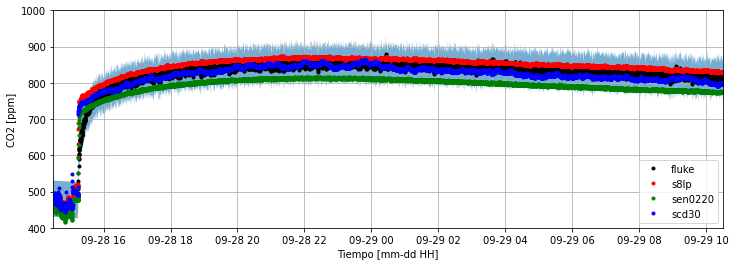

In [14]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse("2021-09-28 14:30") 
fecha2 = fecha1 + pd.Timedelta("20H")

ax.plot(sensores.fluke,"k.",label='fluke')
ax.plot(sensores.s8lp,"r.",label='s8lp')
ax.plot(sensores.sen0220,"g.",label='sen0220')
ax.plot(sensores.scd30,"b.",label='scd30')



fluke = sensores.fluke
fluke.dropna(axis=0,how="all",inplace=True)
ax.fill_between(fluke.index,fluke-50,fluke+50,alpha=.6)


ax.set_ylim(400,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("Tiempo [mm-dd HH]")
ax.legend()
ax.set_xlim(fecha1,fecha2)
ax.grid()

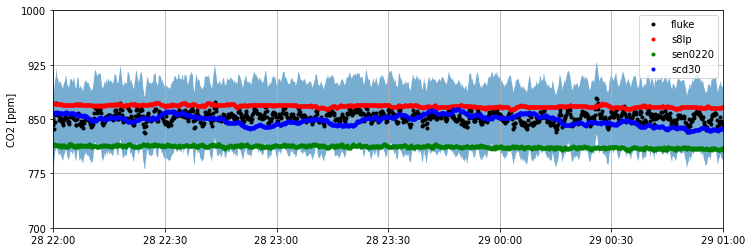

In [15]:
fig, ax = plt.subplots(figsize=(12,4))


fecha1 = parse("2021-09-28 14:30")  + pd.Timedelta('7.5H')
fecha2 = fecha1 + pd.Timedelta("3H")

ax.plot(sensores.fluke,"k.",label='fluke')
ax.plot(sensores.s8lp,"r.",label='s8lp')
ax.plot(sensores.sen0220,"g.",label='sen0220')
ax.plot(sensores.scd30,"b.",label='scd30')



fluke = sensores.fluke
fluke.dropna(axis=0,how="all",inplace=True)
ax.fill_between(fluke.index,fluke-50,fluke+50,alpha=.6)



ax.set_ylim(700,950)
ax.set_ylabel("CO2 [ppm]")
ax.set_yticks(np.linspace(700,1000,5))
ax.legend()
ax.set_xlim(fecha1,fecha2)
ax.grid()

In [ ]:
# fluke_min    =   fluke.resample('20S').bfill()
# s8lp_min     =    s8lp.resample('20S').bfill()
# sen0220_min  = sen0220.resample('20S').bfill()
# scd30_min    =   scd30.resample('20S').bfill()
# datos = pd.concat([fluke_min,s8lp_min,sen0220_min,scd30_min],axis=1)

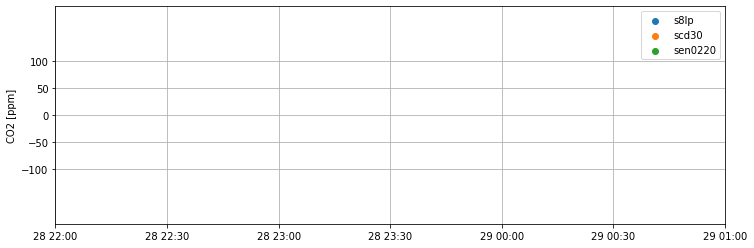

In [23]:
fig, ax = plt.subplots(figsize=(12,4))


fecha1 = parse("2021-09-28 14:30")  + pd.Timedelta('7.5H')
fecha2 = fecha1 + pd.Timedelta("3H")

ax.set_xlim(fecha1,fecha2)
lista = ['s8lp','scd30','sen0220']
for sensor in lista:
    ax.scatter(sensores[fecha1:fecha2].index,sensores[fecha1:fecha2]['fluke']-sensores[fecha1:fecha2][sensor],label=sensor)
#     ax.plot(sensores[sensor],label=sensor)


    
ax.set_yticks(np.linspace(-100,100,5))
ax.set_ylim(-200,200)
ax.set_ylabel("CO2 [ppm]")
# ax.set_title("Error")
ax.legend()
ax.grid()
# calibracion = datos[fecha1:fecha2]

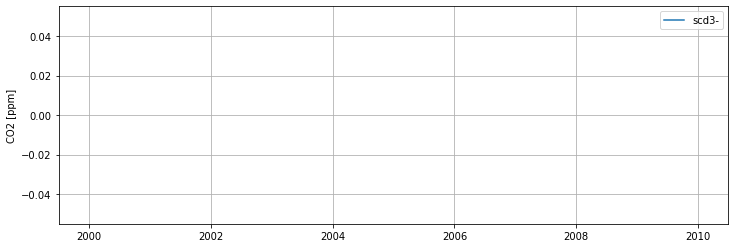

In [39]:
fig, ax = plt.subplots(figsize=(12,4))


ax.plot(sensores['fluke']-sensores['scd30'],label='scd3-')
#     ax.plot(sensores[sensor],label=sensor)


    
# ax.set_yticks(np.linspace(-100,100,5))
# ax.set_ylim(0,1200)
ax.set_ylabel("CO2 [ppm]")
# ax.set_title("Error")
ax.legend()
ax.grid()
# calibracion = datos[fecha1:fecha2]

In [32]:
sensores.tail()

,fluke,s8lp,sen0220,scd30
2021-09-30 14:59:40,NaN,419.0,NaN,NaN
2021-09-30 14:59:40,NaN,NaN,NaN,400.5
2021-09-30 14:59:50,NaN,419.0,NaN,NaN
2021-09-30 14:59:50,NaN,NaN,411.0,NaN
2021-09-30 14:59:50,NaN,NaN,NaN,400.0


In [ ]:
calibracion.to_csv('../data/calibracion_850ppm.csv')

In [ ]:
ax.plot(sensores['fluke']-sensores[sensor],label=sensor)